# NYPD COMPLAINT DATA EDA

In [1]:
# Libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib
import seaborn as sns
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
init_notebook_mode(connected=True)
from plotly import tools
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("E:/sakshi/Project/Dataset/NYPD_Complaint_Data_Current__Year_To_Date.csv")

In [4]:
df.head(10)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/2019,18:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,U,NaN,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/2019,20:30:00,12/31/2019,10:00:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/2019,16:55:00,12/24/2019,17:00:00,COMPLETED,NaN,NaN,...,M,NaN,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/2019,19:32:00,NaN,NaN,COMPLETED,NaN,NaN,...,F,NaN,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/2019,15:30:00,12/30/2019,16:50:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"
5,136697381,94,BROOKLYN,12/28/2019,13:00:00,12/29/2019,08:30:00,COMPLETED,NaN,NaN,...,NaN,NaN,UNKNOWN,UNKNOWN,D,997964,205703,40.731281,-73.950519,"(40.73128148300003, -73.95051933399996)"
6,628084657,69,BROOKLYN,12/22/2019,16:30:00,NaN,NaN,COMPLETED,NaN,NaN,...,M,NaN,25-44,BLACK,M,1010537,168507,40.629159,-73.905299,"(40.629158526000026, -73.90529923099997)"
7,487138011,43,BRONX,12/29/2019,17:20:00,NaN,NaN,COMPLETED,NaN,NaN,...,M,NaN,25-44,BLACK,M,1018876,241924,40.830641,-73.874879,"(40.83064129700006, -73.87487918899996)"
8,227601821,18,MANHATTAN,12/29/2019,12:30:00,12/29/2019,13:30:00,COMPLETED,NaN,NaN,...,M,NaN,25-44,WHITE,F,988353,217918,40.764818,-73.985190,"(40.764818269000045, -73.98518977299993)"
9,536304115,13,MANHATTAN,12/28/2019,15:05:00,12/28/2019,15:10:00,COMPLETED,NaN,NaN,...,F,NaN,18-24,ASIAN / PACIFIC ISLANDER,F,985850,210155,40.743512,-73.994227,"(40.74351160900005, -73.99422735499998)"


In [26]:
df.describe()


,CMPLNT_NUM,ADDR_PCT_CD,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,4.592770e+05,459277.000000,458970.000000,459277.000000,458970.000000,12143.000000,4.592770e+05,459277.000000,459277.000000,459277.000000
mean,5.504539e+08,62.421245,0.927586,306.714978,400.813258,13.305443,1.005152e+06,207861.975313,40.737168,-73.924549
std,2.599501e+08,34.684825,8.180217,156.312100,216.442926,12.462482,2.114262e+04,30090.970619,0.082596,0.076250
min,1.000004e+08,1.000000,0.000000,101.000000,100.000000,1.000000,9.137840e+05,121152.000000,40.498957,-74.253403
25%,3.251920e+08,34.000000,0.000000,118.000000,254.000000,2.000000,9.916830e+05,185313.000000,40.675277,-73.973232
50%,5.509608e+08,62.000000,0.000000,341.000000,343.000000,11.000000,1.004424e+06,207199.000000,40.735329,-73.927185
75%,7.759106e+08,90.000000,0.000000,351.000000,637.000000,30.000000,1.016722e+06,235239.000000,40.812347,-73.882748
max,9.999959e+08,123.000000,97.000000,881.000000,969.000000,34.000000,1.067185e+06,271820.000000,40.912723,-73.700720


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459277 entries, 0 to 459276
Data columns (total 35 columns):
CMPLNT_NUM           459277 non-null int64
ADDR_PCT_CD          459277 non-null int64
BORO_NM              458963 non-null object
CMPLNT_FR_DT         459277 non-null object
CMPLNT_FR_TM         459277 non-null object
CMPLNT_TO_DT         401661 non-null object
CMPLNT_TO_TM         401900 non-null object
CRM_ATPT_CPTD_CD     459277 non-null object
HADEVELOPT           21478 non-null object
HOUSING_PSA          32954 non-null object
JURISDICTION_CODE    458970 non-null float64
JURIS_DESC           459277 non-null object
KY_CD                459277 non-null int64
LAW_CAT_CD           459277 non-null object
LOC_OF_OCCUR_DESC    376535 non-null object
OFNS_DESC            459265 non-null object
PARKS_NM             4019 non-null object
PATROL_BORO          458970 non-null object
PD_CD                458970 non-null float64
PD_DESC              458970 non-null object
PREM_TYP_DESC 

In [28]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon'],
      dtype='object')

In [29]:
df.isnull().sum()

CMPLNT_NUM                0
ADDR_PCT_CD               0
BORO_NM                 314
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
CMPLNT_TO_DT          57616
CMPLNT_TO_TM          57377
CRM_ATPT_CPTD_CD          0
HADEVELOPT           437799
HOUSING_PSA          426323
JURISDICTION_CODE       307
JURIS_DESC                0
KY_CD                     0
LAW_CAT_CD                0
LOC_OF_OCCUR_DESC     82742
OFNS_DESC                12
PARKS_NM             455258
PATROL_BORO             307
PD_CD                   307
PD_DESC                 307
PREM_TYP_DESC          1846
RPT_DT                    0
STATION_NAME         447134
SUSP_AGE_GROUP       108742
SUSP_RACE            108742
SUSP_SEX             108742
TRANSIT_DISTRICT     447134
VIC_AGE_GROUP             3
VIC_RACE                  3
VIC_SEX                   3
X_COORD_CD                0
Y_COORD_CD                0
Latitude                  0
Longitude                 0
Lat_Lon                   0
dtype: int64

# Complaints in Every Borough

In [30]:

df['countvar']=1

dfboro = df.groupby('BORO_NM',as_index=False).count()
dfboro = dfboro.sort_values('countvar',ascending= False)[['BORO_NM','countvar']]
colors = ['lightsalmon',] * 5
colors[0] = 'crimson'
marker_color=colors
t1 = go.Bar(x=dfboro.BORO_NM.values,y=dfboro.countvar.values,marker_color=colors)
layout = go.Layout(dict(title= "Complaints in Every Borough",yaxis=dict(title="Num of Complaints")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

In [31]:

df['countvar']=1

dfboro = df.groupby('BORO_NM',as_index=False).count()
dfboro = dfboro.sort_values('countvar',ascending= False)[['BORO_NM','countvar']]
labels = dfboro.BORO_NM.values
values = dfboro.countvar.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Complaints in Every Borough")
fig.show()

# Complaints according to Offenses

In [32]:
df['countvar']=1
dfoff = df.groupby('OFNS_DESC',as_index=False).count()
dfoff = dfoff.sort_values('countvar',ascending= False)[['OFNS_DESC','countvar']]
colors = ['lightsalmon',] * 10
t1 = go.Bar(x=dfoff.OFNS_DESC.values,y=dfoff.countvar.values,marker_color=colors,textposition='outside')
layout = go.Layout(dict(title= "Offense Description",yaxis=dict(title="Num of Complaints")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig)

# PD_DESC :(More granular than Offense Description)
Description of internal classification corresponding with PD code (More granular than Offense Description)
This category:subcategory relationship can help us work backwards from the PD_DESC to find the the correct OFNS_DESC for the problematic rows

In [33]:
df['countvar']=1

dfpd = df.groupby('PD_DESC',as_index=False).count()
dfpd = dfpd.sort_values('countvar',ascending= False)[['PD_DESC','countvar']][:50]
t1 = go.Bar(x=dfpd.PD_DESC.values,y=dfpd.countvar.values,marker_color='rgb(26, 118, 255)',textposition='outside')
layout = go.Layout(dict(title= "More granular Offense Description",yaxis=dict(title="Num of Complaints")))
data = [t1]
fig =go.Figure(data,layout)
iplot(fig) 

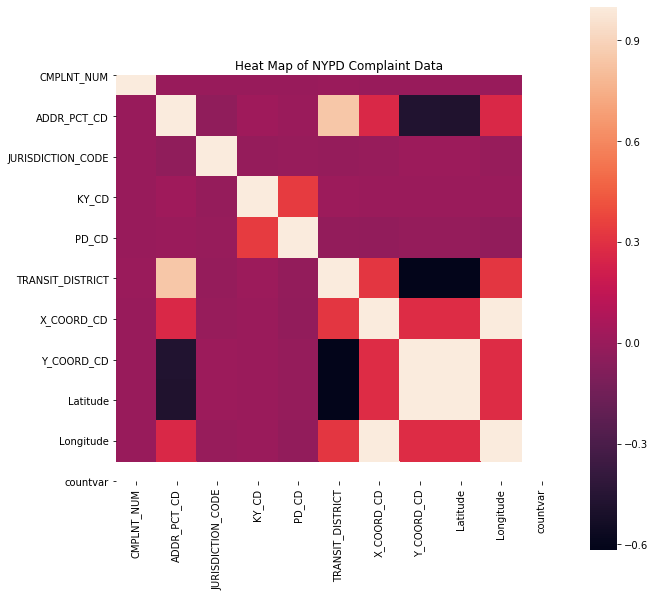

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.title("Heat Map of NYPD Complaint Data")
plt.show()

In [86]:
import folium
from folium import plugins

# Create a list with coordinates for folium
locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()

map_osm = folium.Map(location=[40.6865,-73.9496], tiles='Stamen Terrain', zoom_start=10)


marker_cluster = plugins.MarkerCluster().add_to(map_osm)

#I don`t know how to add a popup station`s name imported from df_stations['start_station_name'] column, ordinary solution doesn't work :/
# parse_html=True - this is the solution

for point in range(0, len(df[:1000])):
    folium.Marker(locationlist[point],
                  popup=folium.Popup(df['PATROL_BORO'][point], parse_html=True),
                  icon=folium.Icon(color='blue', icon_color='white', icon='fa-circle', angle=0, prefix='fa')).add_to(marker_cluster)

map_osm

In [87]:
B2_district=df.loc[df.DISTRICT=='B2'][['Lat','Long']]
B2_district.Lat.fillna(0, inplace = True)
B2_district.Long.fillna(0, inplace = True) 

map_1=folium.Map(location=[42.356145,-71.064083], 
                 tiles = "OpenStreetMap",
                zoom_start=11)

folium.CircleMarker([42.319945,-71.079989],
                        radius=70,
                        fill_color="#b22222",
                        popup='Homicide',
                        color='red',
                       ).add_to(map_1)


HeatMap(data=B2_district, radius=16).add_to(map_1)

map_1

NameError: name 'dum' is not defined

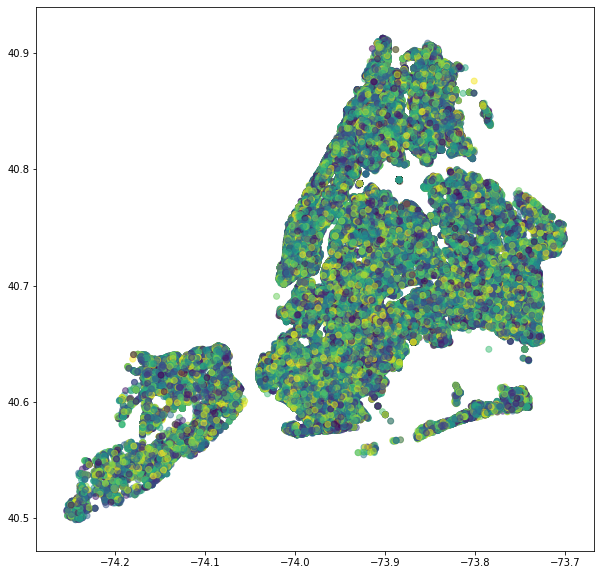

In [93]:
locations = df[['Latitude', 'Longitude']]
x=locations.Longitude
y=locations.Latitude
colors = np.random.rand(len(x))
plt.figure(figsize = (10,10))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

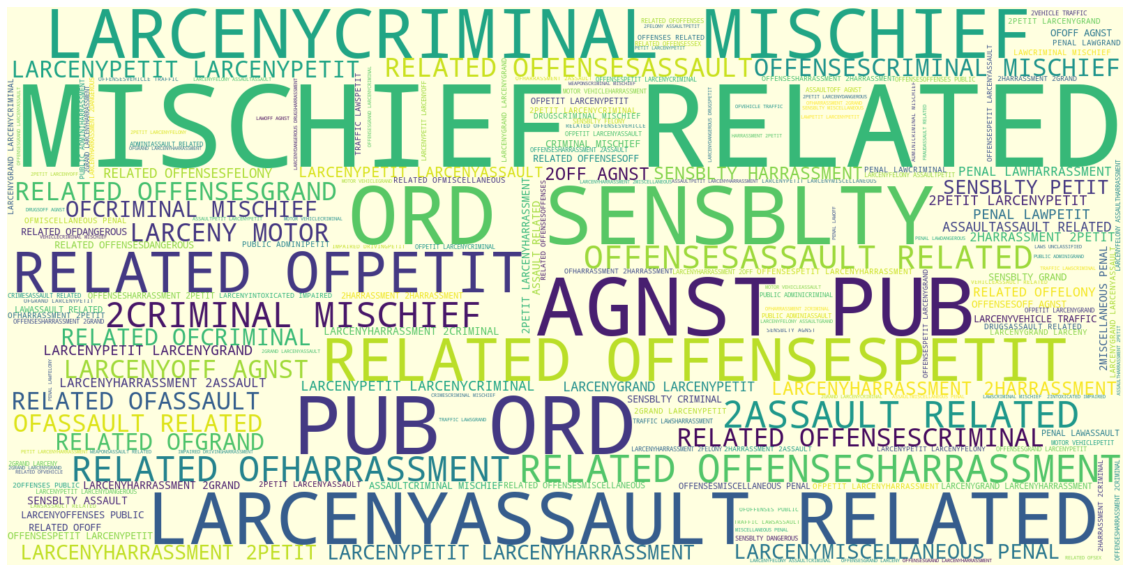

In [106]:
from wordcloud import WordCloud
text = []
for i in df.OFNS_DESC:
    text.append(i)
text = ''.join(map(str, text))

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='lightyellow').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()